In [1]:
import pandas as pd
import os
import datetime as dt
import scipy.stats as st

In [2]:
chess2020_csv = os.path.join("Resources", "players_2020.csv")

## Section by age group then find rating average in each age group

In [28]:
## We inspected the original CSV and chose the columns we believed were pertinent
columns_to_keep = ['fide_id', 'name', 'yob','rating_standard']
df = pd.read_csv(chess2020_csv, usecols=columns_to_keep)
df.head()

,fide_id,name,yob,rating_standard
0,100013,"Campora, Daniel H.",1957,2420.0
1,100013,"Campora, Daniel H.",1957,2429.0
2,100013,"Campora, Daniel H.",1957,2420.0
3,100013,"Campora, Daniel H.",1957,2420.0
4,100013,"Campora, Daniel H.",1957,2420.0


In [29]:
df = df.sort_values(['name','rating_standard'], ascending=(True, False))
df.head(5)

,fide_id,name,yob,rating_standard
2458260,10245154,"A B M Jobair, Hossain",1998,NaN
2458261,10245154,"A B M Jobair, Hossain",1998,NaN
2458262,10245154,"A B M Jobair, Hossain",1998,NaN
2458263,10245154,"A B M Jobair, Hossain",1998,NaN
2458264,10245154,"A B M Jobair, Hossain",1998,NaN


In [30]:
df = df.drop_duplicates(subset='name', keep='first')
df.head(10)

,fide_id,name,yob,rating_standard
2458260,10245154,"A B M Jobair, Hossain",1998,NaN
3907164,25121731,A C J John,1987,1063.0
4593010,35077023,A Chakravarthy,1986,1151.0
2439902,10207538,"A E M, Doshtagir",1974,1840.0
5069603,55630910,"A Flores, Ervin",2011,NaN
2138026,5716365,"A Hamid, Harman",1970,1325.0
2443296,10215727,"A K M Jane, Alam",1969,NaN
2439482,10206612,"A K M, Sourab",0,1598.0
2035197,5045886,"A K, Kalshyan",1964,1777.0
2336521,8605360,"A La, Teng Hua",1993,1915.0


In [31]:
df['age']= 2020 - df['yob']

In [32]:
df.head()

,fide_id,name,yob,rating_standard,age
2458260,10245154,"A B M Jobair, Hossain",1998,NaN,22
3907164,25121731,A C J John,1987,1063.0,33
4593010,35077023,A Chakravarthy,1986,1151.0,34
2439902,10207538,"A E M, Doshtagir",1974,1840.0,46
5069603,55630910,"A Flores, Ervin",2011,NaN,9


In [33]:
# Create bins in which to place values
bins = [0, 19, 29, 39, 49, 59, 69,79]

# Create labels for these bins
group_labels = ["Less than 20", "20 to 30", "30 to 40","40 to 50","50 to 60", "60 to 70", "70 or more"]

In [34]:
# Slice the data and place it into bins
pd.cut(df['age'], bins, labels=group_labels).head()

2458260        20 to 30
3907164        30 to 40
4593010        30 to 40
2439902        40 to 50
5069603    Less than 20
Name: age, dtype: category
Categories (7, object): [Less than 20 < 20 to 30 < 30 to 40 < 40 to 50 < 50 to 60 < 60 to 70 < 70 or more]

In [35]:
# Place the data series into a new column inside of the DataFrame
df["age group"] = pd.cut(df["age"], bins, labels=group_labels)
df.head(20)

,fide_id,name,yob,rating_standard,age,age group
2458260,10245154,"A B M Jobair, Hossain",1998,NaN,22,20 to 30
3907164,25121731,A C J John,1987,1063.0,33,30 to 40
4593010,35077023,A Chakravarthy,1986,1151.0,34,30 to 40
2439902,10207538,"A E M, Doshtagir",1974,1840.0,46,40 to 50
5069603,55630910,"A Flores, Ervin",2011,NaN,9,Less than 20
2138026,5716365,"A Hamid, Harman",1970,1325.0,50,50 to 60
2443296,10215727,"A K M Jane, Alam",1969,NaN,51,50 to 60
2439482,10206612,"A K M, Sourab",0,1598.0,2020,NaN
2035197,5045886,"A K, Kalshyan",1964,1777.0,56,50 to 60
2336521,8605360,"A La, Teng Hua",1993,1915.0,27,20 to 30


In [36]:
# Create a GroupBy object based upon "Age Group"
df = df.drop(columns=['name','yob','age','fide_id'])

In [37]:
df.head(10)

,rating_standard,age group
2458260,NaN,20 to 30
3907164,1063.0,30 to 40
4593010,1151.0,30 to 40
2439902,1840.0,40 to 50
5069603,NaN,Less than 20
2138026,1325.0,50 to 60
2443296,NaN,50 to 60
2439482,1598.0,NaN
2035197,1777.0,50 to 60
2336521,1915.0,20 to 30


In [38]:
df = df.dropna(how="any")
df.head()

,rating_standard,age group
3907164,1063.0,30 to 40
4593010,1151.0,30 to 40
2439902,1840.0,40 to 50
2138026,1325.0,50 to 60
2035197,1777.0,50 to 60


In [39]:
#Find the average rating for each age group
df_age_mean = df.groupby('age group').mean()
df_age_mean

,rating_standard
age group,
Less than 20,1372.557734
20 to 30,1662.402924
30 to 40,1807.173324
40 to 50,1789.575543
50 to 60,1811.122229
60 to 70,1783.577378
70 or more,1734.328805


In [40]:
# Find how many players are in each age group
df=df.groupby('age group')
df_count = df["rating_standard"].count()
df_count

age group
Less than 20    88856
20 to 30        64913
30 to 40        46416
40 to 50        43710
50 to 60        44752
60 to 70        33905
70 or more      17445
Name: rating_standard, dtype: int64

Text(0.5, 1.0, 'How Many Players In Each Age Group (2020)')

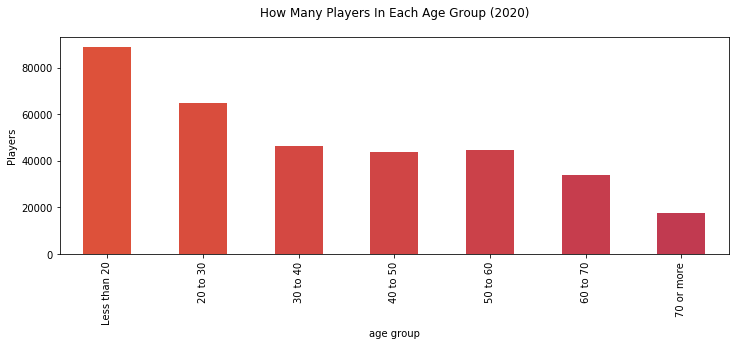

In [195]:
import numpy as np
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))
ag = df_count.plot(kind='bar', stacked=True, color=color, legend=False, figsize=(12, 4) )
ag.set_ylabel("Players")
ag.set_title('How Many Players In Each Age Group (2020)', pad=20)

Text(0.5, 1.0, 'Average rating for each age group (2020)')

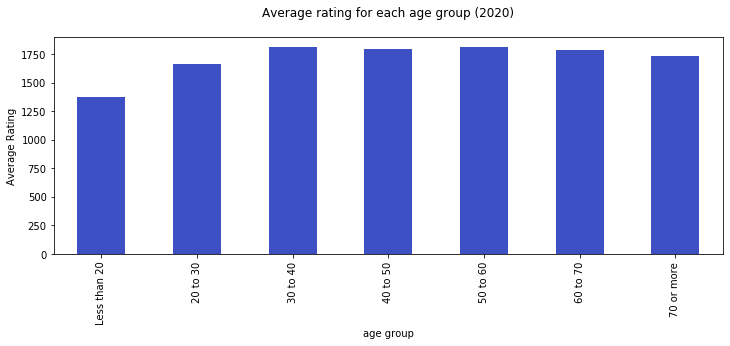

In [209]:
color = cm.coolwarm(np.linspace(start = 2, stop = 10, num = 5, dtype = int))
ag = df_age_mean.plot(kind='bar',color= color, legend=False, figsize=(12, 4) )
ag.set_ylabel("Average Rating")
ag.set_title('Average rating for each age group (2020)', pad=20)